## Testing rdataframe tracktree reading in swan
First we define useful functions

In [1]:
gROOT->ProcessLine(".x /eos/experiment/sndlhc/users/aiulian/fedraxswan/macros/rootlogon.C")

Load FEDRA libs
(long) 0


In [2]:
EdbSegP GetFirstSegment(TClonesArray sf){
  //getting first segment, equivalent to t., which creates problem to RDataFrame due to branch name
  EdbSegP* firstseg = (EdbSegP*) sf.At(0);
  EdbSegP tr(*firstseg);
  return tr;
}

In [3]:
TString path_prefix = TString(getenv("CERNBOX_HOME"));
path_prefix.Data()

(const char *) "/eos/user/a/aiulian/"


In [4]:
TFile *tracksfile = TFile::Open((path_prefix+TString("/SNDCosmics_tutorial/b000001/b000001.0.0.0.trk.root")).Data());
TTree *trackstree = (TTree*) tracksfile->Get("tracks");
ROOT::RDataFrame df(*trackstree);

In [5]:
auto colNames = df.GetColumnNames();
// Print columns' names
for (auto &&colName : colNames) std::cout << colName << std::endl;

trid
nseg
npl
n0
xv
yv
w
t.
s.fUniqueID
s.fBits
s.EdbTrack2D
s.ePID
s.eID
s.eVid[2]
s.eAid[2]
s.eFlag
s.eTrack
s.eX
s.eY
s.eZ
s.eTX
s.eTY
s.eSZ
s.eChi2
s.eProb
s.eW
s.eVolume
s.eDZ
s.eDZem
s.eP
s.eMCTrack
s.eMCEvt
s.eScanID
s.eCOV
s
sf.fUniqueID
sf.fBits
sf.EdbTrack2D
sf.ePID
sf.eID
sf.eVid[2]
sf.eAid[2]
sf.eFlag
sf.eTrack
sf.eX
sf.eY
sf.eZ
sf.eTX
sf.eTY
sf.eSZ
sf.eChi2
sf.eProb
sf.eW
sf.eVolume
sf.eDZ
sf.eDZem
sf.eP
sf.eMCTrack
sf.eMCEvt
sf.eScanID
sf.eCOV
sf


In [6]:
auto dftr = df.Define("tr",GetFirstSegment,{"sf"});

## Definition of variables
Here, it is useful to define the variables we want to access. They can be transformed, when required (3D angle, change of units, etc.).

Calling the attributes directly (aka "tr.eTX") is not supported and not recommended. Better to use accessors ("tr.TX()")

In [7]:
auto dftr1 = dftr.Define("TX","tr.TX()  ")
                 .Define("TY","tr.TY()  ")
                 .Define("Xcm","tr.X()*1e-4  ")
                 .Define("Ycm","tr.Y()*1e-4  ");

In [8]:
//3D angles
auto dftr2 = dftr1.Define("tantheta","tr.Theta()").Define("theta","TMath::ATan(tantheta)");

//selecting good tracks (aka long, in this case
auto dfgoodtr = dftr2.Filter("nseg>2");

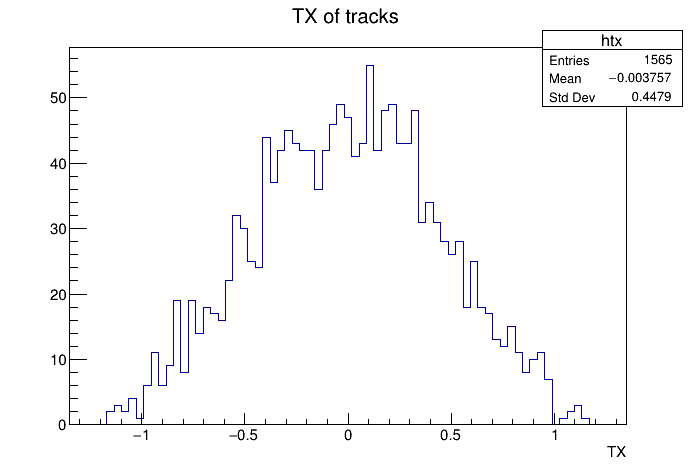

In [9]:
auto htx = dfgoodtr.Histo1D({"htx","TX of tracks;TX", 75,1.5,1.5},"TX");
TCanvas *ctx = new TCanvas("ctx","TX angle");
htx->DrawClone();
ctx->Draw();

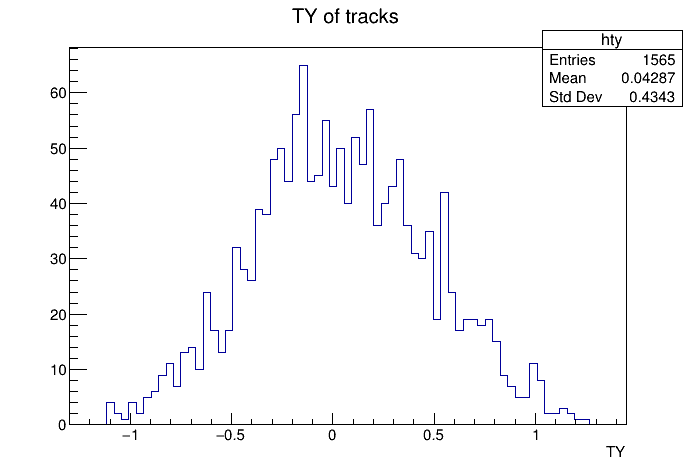

In [10]:
auto hty = dfgoodtr.Histo1D({"hty","TY of tracks;TY", 75,1.5,1.5},"TY");
TCanvas *cty = new TCanvas("cty","TY angle");
hty->DrawClone();
cty->Draw();

In [11]:
hty->GetEntries()

(double) 1565.0000


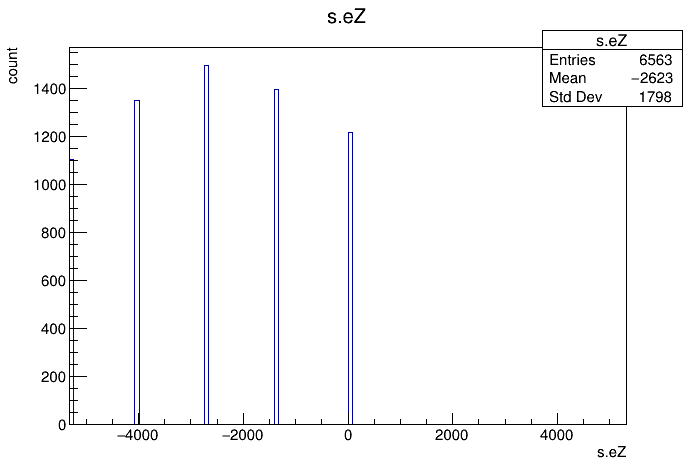

In [12]:
auto hsz = dfgoodtr.Histo1D("s.eZ");
TCanvas *cz = new TCanvas("cz","Z Position of segments");
hsz->DrawClone();
cz->Draw();